In [1]:
import torch
import numpy as np
import torch.nn as nn
import pickle
import os 
import sys
import matplotlib.pyplot as plt

import json
import matplotlib
from scipy.signal import savgol_filter



font = {'weight' : 'bold',
        'size'   : 24}

In [39]:
results = {}

In [41]:
from glob import glob
dirs = glob("./results/*_centralized*4_results*.pkl")

candidates = ["5","6","0","22"]

for i,d in enumerate(dirs):
#     breakpoint()
    d = dirs[i]
    label = dirs[i].split("_")[-3]
    number = dirs[i].split("_")[1]
#     print(number)
    
    with open(d, "rb") as f:
#         breakpoint()
        res = pickle.load(f)
        r = res["reward"]
        r = np.array(r)
        if label not in results and r.shape[0]==300:
#             print(number)
            results[label] = np.zeros((len(r),))
            results[label] += np.array(r)
        else:
#             breakpoint()
            if (r.shape[0] == 300) and (number in candidates):
                print(number)
                results[label] += np.array(r)
            
            


5
22
6


In [8]:
from glob import glob
dirs = glob("./results/*_results*.pkl")


for i,d in enumerate(dirs):
#     breakpoint()
    d = dirs[i]
    label = dirs[i].split("_")[-3]
    
    
    with open(d, "rb") as f:
#         breakpoint()
        res = pickle.load(f)
        r = res["reward"]
        if label not in results:
            results[label] = np.zeros((len(r),))
            r = np.array(r)
            results[label] += np.array(r)
        else:
            r = np.array(r)
            if r.shape[0] == 300:
                print(dirs[i].split("_")[1])
                results[label] += np.array(r)

5
0
20
0
20
0
5
20
6
0
22
20
9
10
0
20
6
10
10
22
29
0
10


In [9]:
import json
import matplotlib
from scipy.signal import savgol_filter

heuristic_results = [14.48,16.50,21.12,24.32]
heuristic = np.zeros((300,))
heuristic += np.mean(heuristic_results)

figure_map= {
    "MARL":["b", "-"],
    "Centralized_RL":["r","-."],
    "Heuristic_baseline":["g",":"]
    
}

font = {'weight' : 'bold',
        'size'   : 24}

results = {}

for i,d in enumerate(dirs):
#     breakpoint()
    d = dirs[i]
    label = dirs[i].split("_")[-2]
    
    
    with open(d, "rb") as f:
#         breakpoint()
        res = pickle.load(f)
        r = res["reward"]
        if label not in results:
            results[label] = np.zeros((len(r),))
            r = np.array(r)
            results[label] += np.array(r)
        else:
            r = np.array(r)
            results[label] += np.array(r)

plt.figure(figsize = (20,10))
if label == "centralized":
    label_n = "Centralized RL"
elif label == "marl":
    label_n = "MARL"
plt.plot(savgol_filter(results[label], 21, 1)/len(dirs),c = figure_map[label_n][0],lw=5 ,ls=figure_map[label_n][1], label = label_n)
plt.plot(heuristic, c = figure_map["Heuristic_baseline"][0],lw=5 ,ls=figure_map["Heuristic_baseline"][1], label = "Heuristic")
plt.xlabel("Training Epochs", fontsize=24, weight="bold")
plt.ylabel("Reward", fontsize=24, weight="bold")
matplotlib.rc('font', **font)
plt.grid()
plt.legend()




ValueError: operands could not be broadcast together with shapes (300,) (200,) (300,) 

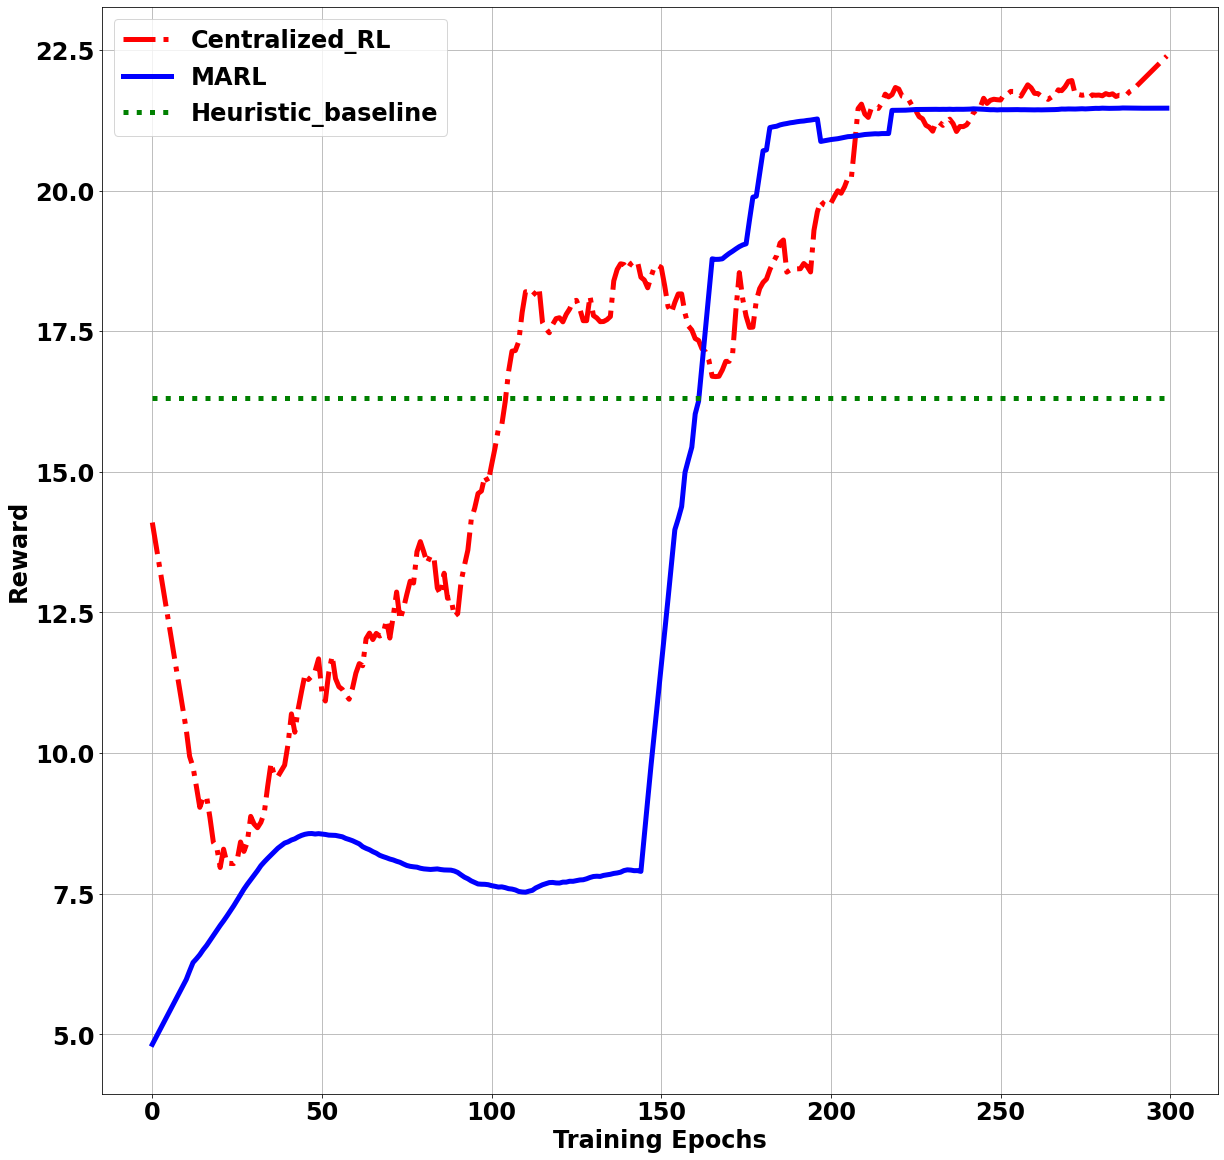

In [31]:
import json
import matplotlib
from scipy.signal import savgol_filter

heuristic_results = [16.32]
# 24.32
heuristic = np.zeros((300,))
heuristic += np.mean(heuristic_results)

figure_map= {
    "MARL":["b", "-"],
    "Centralized_RL":["r","-."],
    "Heuristic_baseline":["g",":"]
    
}

font = {'weight' : 'bold',
        'size'   : 24}

plt.figure(figsize = (20,20))


for label in results:
    
    if label == "centralized":
        num = 3
        label_n = "Centralized_RL"
    elif label == "marl":
        num = 3
        label_n = "MARL"
    plt.plot(savgol_filter(results[label], 21, 1)/num,c = figure_map[label_n][0],lw=5 ,ls=figure_map[label_n][1], label = label_n)
plt.plot(heuristic, c = figure_map["Heuristic_baseline"][0],lw=5 ,ls=figure_map["Heuristic_baseline"][1], label = "Heuristic_baseline")
plt.xlabel("Training Epochs", fontsize=24, weight="bold")
plt.ylabel("Reward", fontsize=24, weight="bold")
matplotlib.rc('font', **font)
plt.grid()
plt.legend()
plt.savefig("./results/performance_good.png")


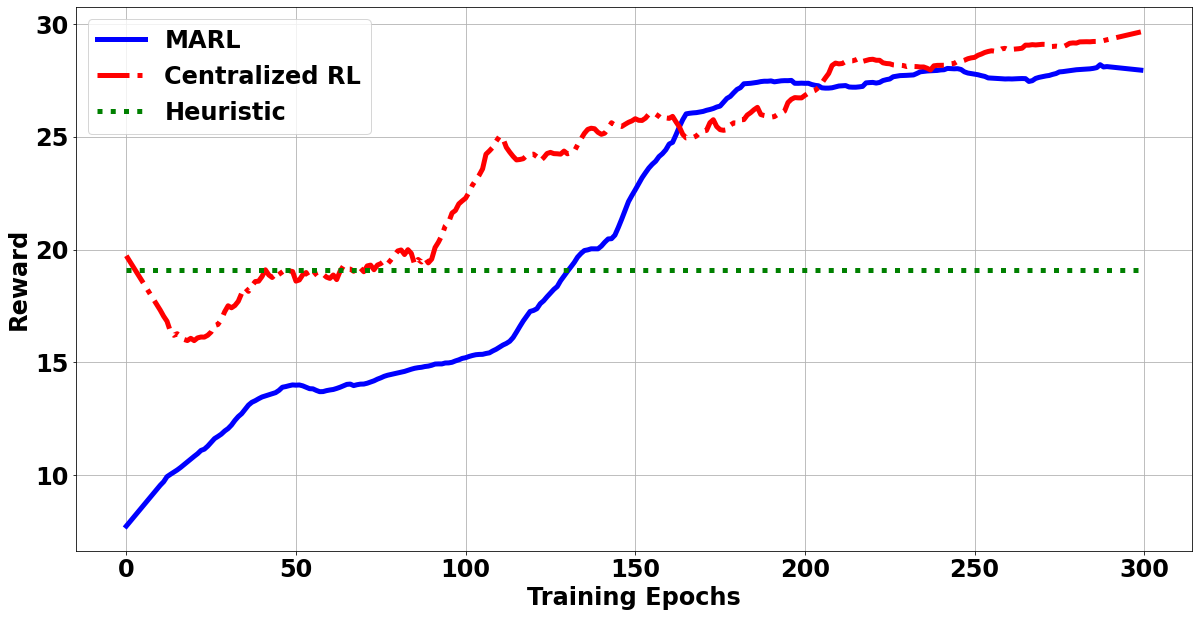

In [42]:
import json
import matplotlib
from scipy.signal import savgol_filter

plt.figure(figsize = (20,10))

heuristic_results = [14.48,16.50,21.12,24.32]
heuristic = np.zeros((300,))
heuristic += np.mean(heuristic_results)

figure_map= {
    "MARL":["b", "-"],
    "Centralized RL":["r","-."],
    "Heuristic":["g",":"]
    
}

font = {'weight' : 'bold',
        'size'   : 24}

for label in results:
    
    if label == "centralized":
        num = 3
        label_n = "Centralized RL"
    elif label == "marl":
        num = 3
        label_n = "MARL"
    plt.plot(savgol_filter(results[label], 21, 1)/num,c = figure_map[label_n][0],lw=5 ,ls=figure_map[label_n][1], label = label_n)
plt.plot(heuristic, c = figure_map["Heuristic"][0],lw=5 ,ls=figure_map["Heuristic"][1], label = "Heuristic")
plt.xlabel("Training Epochs", fontsize=24, weight="bold")
plt.ylabel("Reward", fontsize=24, weight="bold")
matplotlib.rc('font', **font)
plt.grid()
plt.legend()
plt.savefig("./results/performance.png")

In [12]:
results[label] -= 10

### Scalibility figure

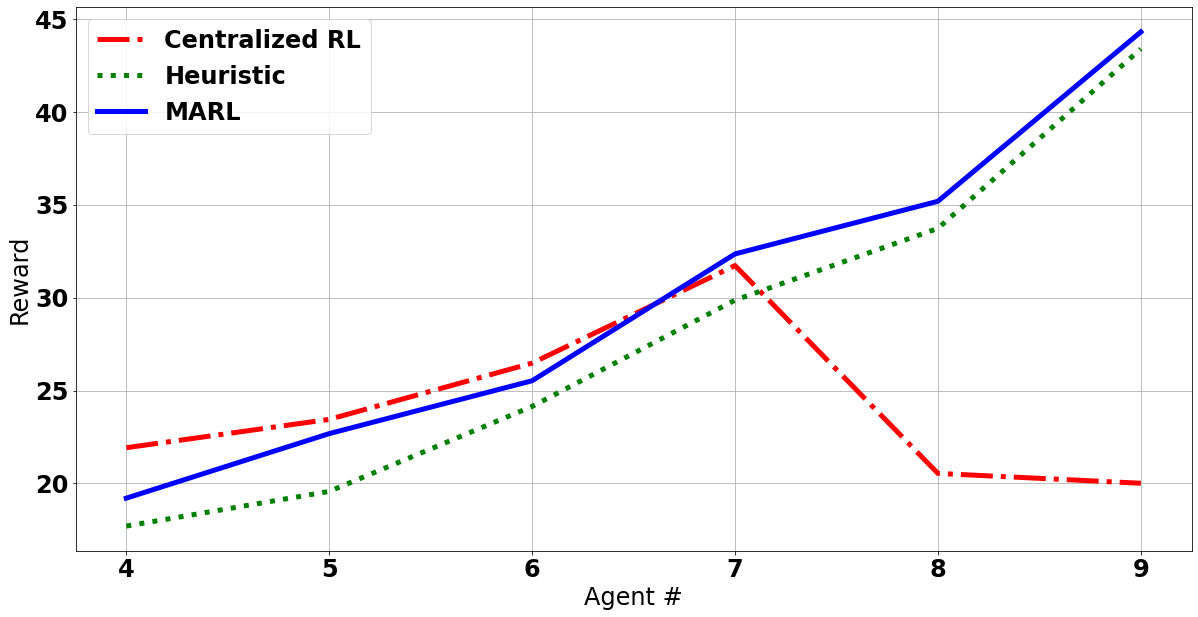

In [43]:
# centralized_dist = []
heuristic = []
centralized = []
marl = []
env_num = [4,5,6,7,8,9]

figure_map= {
    "MARL":["b", "-"],
    "Centralized RL":["r","-."],
    "Heuristic":["g",":"]
    
}

dict_heu = {
    4:[14.48, 16.50, 22.12],
    5:[12.3, 22.9, 23.5],
    6:[22.00, 21.53, 28.90],
    7:[32.6, 25.50, 31.5],
    8:[33.5, 32.6, 35.1],
    9:[41.01, 43.49, 45.70]
    
}

dict_cen = {
    4:[19.89, 22.51, 23.36],
    5:[22.3, 23.07, 24.97],
    6:[22.34, 27.70, 29.39],
    7:[33.75, 29.71, 31.73],
    8:[18.75, 23.15, 19.71],
    9:[19.51, 15.19, 25.32]
}

dict_marl = {
    4:[15.64, 21.87, 20.10],
    5:[27.47, 22.21, 26.56],
    6:[26.12, 29.80, 33.40],
    7:[33.81, 31.86, 31.03],
    8:[34.73, 39.33, 32.73],
    9:[43.40, 43.11, 47.20]
}

dict_marl_nocomm = {
    4:[15.64, 21.87, 20.10],
    5:[24.93, 16.55, 26.56],
    6:[18.08, 29.80, 28.70],
    7:[34.18, 31.86, 31.03],
    8:[36.48, 36.37, 32.73],
    9:[41.90, 43.84, 47.20]
}



for k in env_num:
    centralized.append(np.mean(dict_cen[k]))
    heuristic.append(np.mean(dict_heu[k]))
    marl.append(np.mean(dict_marl_nocomm[k]))

plt.figure(figsize = (20,10))
matplotlib.rc('font', **font)
plt.plot(env_num,centralized,alpha=1,c = figure_map["Centralized RL"][0],lw=5 ,ls=figure_map["Centralized RL"][1], label = "Centralized RL")
plt.plot(env_num,heuristic,c = figure_map["Heuristic"][0],lw=5 ,ls=figure_map["Heuristic"][1], label = "Heuristic")
plt.plot(env_num,marl,c = figure_map["MARL"][0],lw=5 ,ls=figure_map["MARL"][1], label = "MARL")
plt.xlabel("Agent #")
plt.ylabel("Reward")
plt.grid()
plt.legend()
plt.savefig("./results/scalability_nocomm.png")
plt.show()


[20 25 30 35 40 45]


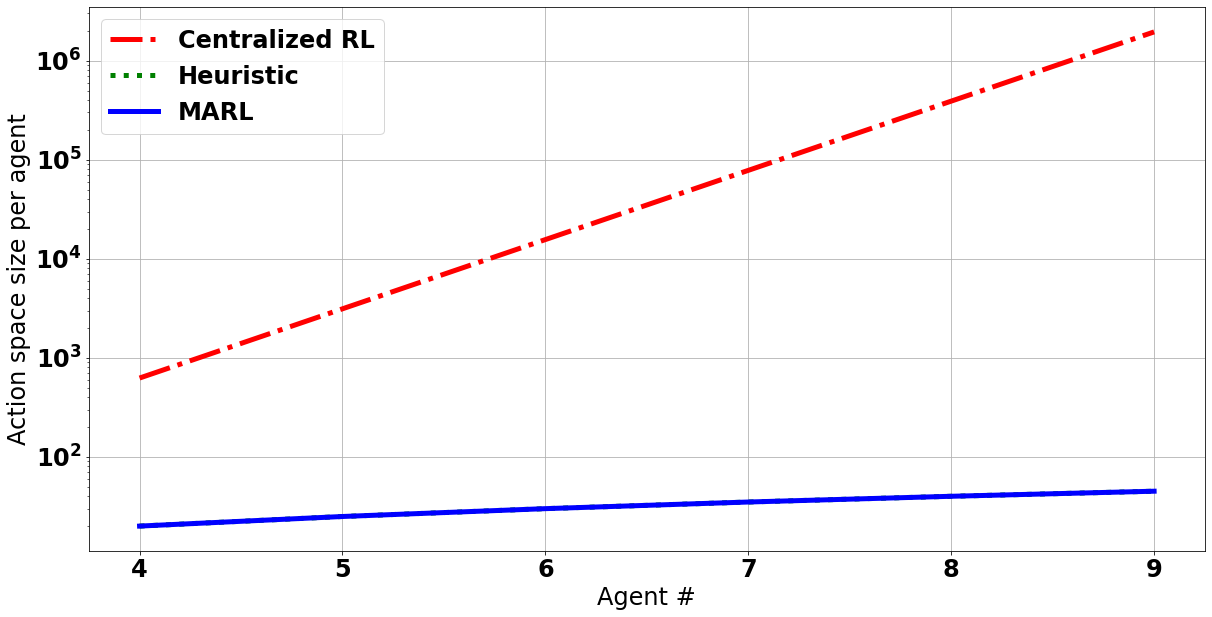

In [44]:
marl_action = []

for i in env_num:
    marl_action.append(5**i)
    
result = (np.arange(6) + 4)  * 5
print(result)
    
plt.figure(figsize = (20,10))
matplotlib.rc('font', **font)
plt.plot(env_num,marl_action,alpha=1,c = figure_map["Centralized RL"][0],lw=5 ,ls=figure_map["Centralized RL"][1], label = "Centralized RL")
plt.plot(env_num,result,c = figure_map["Heuristic"][0],lw=5 ,ls=figure_map["Heuristic"][1], label = "Heuristic")
plt.plot(env_num,result,c = figure_map["MARL"][0],lw=5 ,ls=figure_map["MARL"][1], label = "MARL")
plt.xlabel("Agent #")
plt.ylabel("Action space size per agent")
plt.yscale("log")
plt.legend()
plt.grid()
plt.savefig("./results/action_space_log.png")
plt.show()


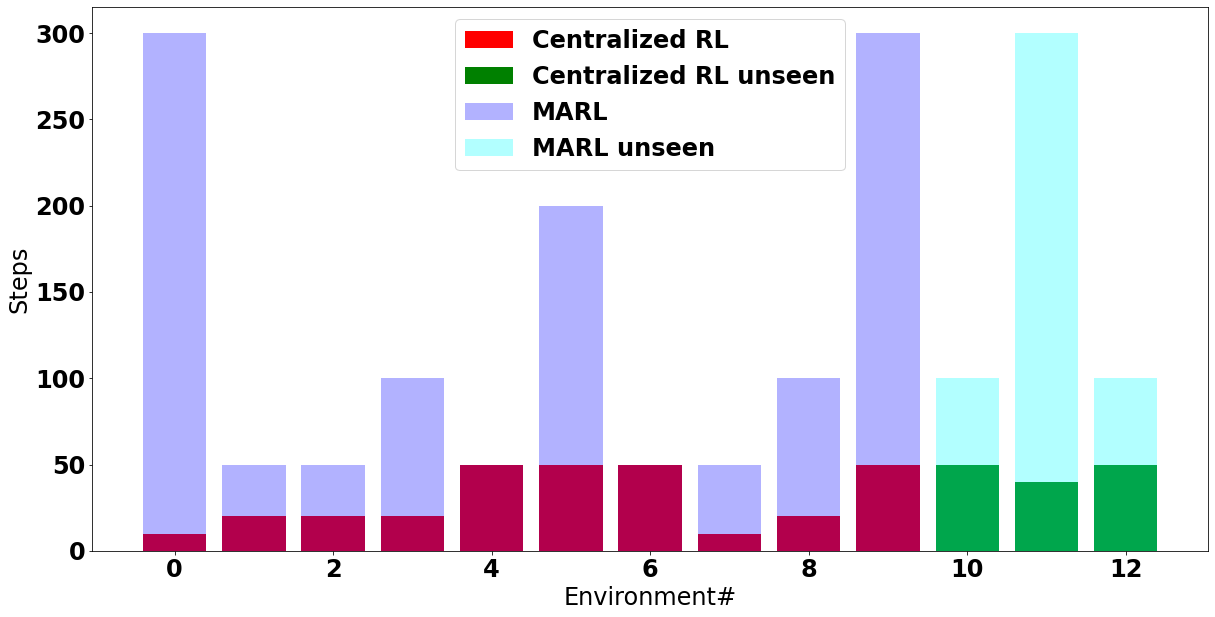

In [45]:
centralized_dist = [10,20,20,20,50,50,50,10,20,50]
marl_dist = [300,50,50,100,50,200,50,50,100,300]
env_num = [0,1,2,3,4,5,6,7,8,9]
env_test = [10,11,12]
centralized_test = [50,40,50]
marl_test = [100,300,100]



plt.figure(figsize = (20,10))
matplotlib.rc('font', **font)

plt.bar(env_num,centralized_dist,alpha=1,label="Centralized RL",color="r")
plt.bar(env_test,centralized_test,alpha=1,label="Centralized RL unseen",color="g")
plt.bar(env_num,marl_dist,alpha=0.3,label="MARL",color="b")
plt.bar(env_test,marl_test,alpha=0.3,label="MARL unseen",color="cyan")
plt.xlabel("Environment#")
plt.ylabel("Steps")
plt.legend()
plt.savefig("./results/fine_tune.png")
plt.show()

In [17]:
300 * 13 - (100 + np.sum(marl_dist))

2050

In [26]:
np.mean([14.48,16.50,21.12,24.32])

19.105

In [25]:
def draw(env, size_on=True, serve_on=True):
        # draw UEs position
    plt.figure(dpi=100, figsize=[5, 5])
    plt.xlim(0, env.border[0])
    plt.ylim(0, env.border[1])
    t_ues = env.ues_pos
    if size_on:
        t_size = env.MA_rate.numpy()
    else:
        t_size = 5

#     print(t_size.shape, t_ues.shape)

    plt.scatter(t_ues[:, 0], t_ues[:, 1], s = np.transpose(t_size * 100))

    if serve_on:
       plt.scatter(env.enbs_pos[:,0],env.enbs_pos[:,1],marker="x",s = 200)
    plt.show()
    
draw(env,False)

NameError: name 'env' is not defined